,disease:,no disease:,total:
exposed:,283,669,952
nonexposed:,668,5073,5741
total:,951,5742,6693




True Relative Risk: 2.554821554370251



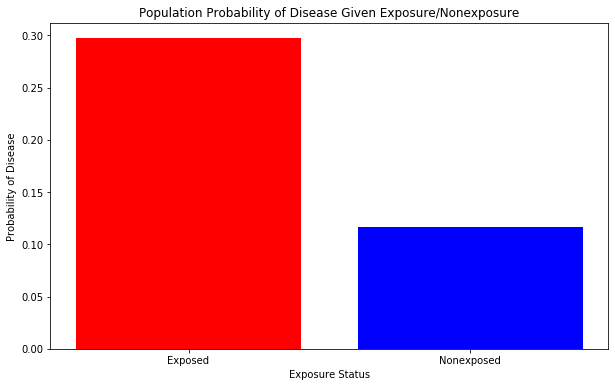

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample size,relative_risk,log_relative_risk,var_log_relative_risk,ub_ci_log_rr,lb_ci_log_rr,weight
study number:,,,,,,,,,,,
0,6,11,10,78,105,3.105882,1.133298,0.196480,2.002088,0.264508,5.089589
1,24,59,58,388,529,2.223515,0.799089,0.044618,1.213098,0.385080,22.412630
2,29,57,60,404,550,2.607752,0.958489,0.037366,1.337364,0.579613,26.762050
3,12,27,24,191,254,2.756410,1.013929,0.094708,1.617112,0.410746,10.558791
4,28,60,64,493,645,2.769176,1.018550,0.038180,1.401530,0.635570,26.191506
5,2,3,3,20,28,3.066667,1.120591,0.589855,2.625911,-0.384728,1.695332
6,14,37,35,283,369,2.494118,0.913935,0.077248,1.458686,0.369184,12.945402
7,33,62,61,474,630,3.046592,1.114024,0.034301,1.477026,0.751021,29.153670
8,20,64,42,475,601,2.930839,1.075289,0.059971,1.555271,0.595307,16.674858


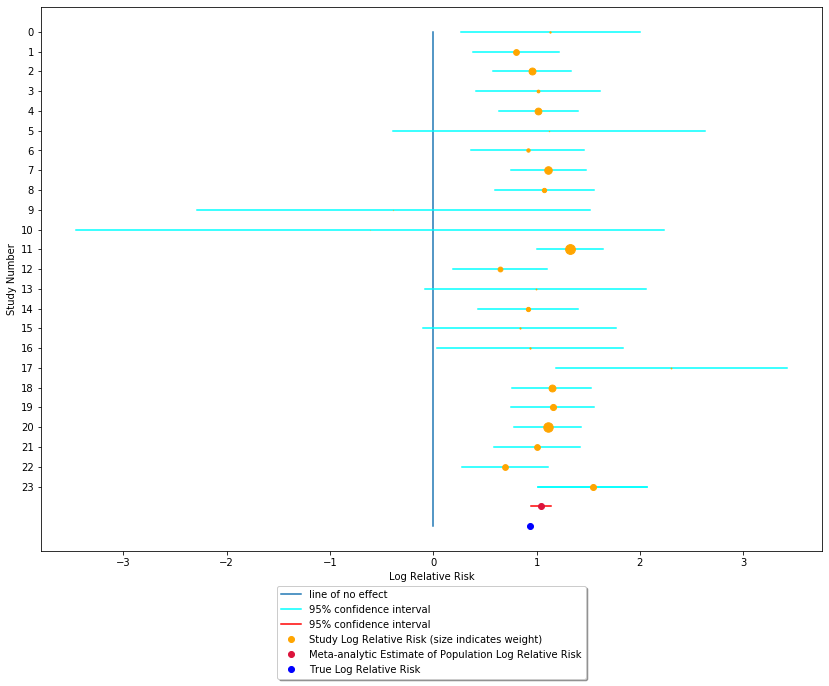

Z statistic of summary effect estimate =  20.515711511160227
p <  0.001


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

pd.set_option('mode.chained_assignment', None)

# generating the population 

population = np.array([])

population_size = np.random.randint(1000,10000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)


for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

        

# creating the counts

population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no disease:', 'total:'])

if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,0] == 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[0,0] == 0.5
    

df_pop.iloc[0,0] = exposed_disease
df_pop.iloc[0,1] = exposed_no_disease
df_pop.iloc[0,2]  = exposed_disease + exposed_no_disease
df_pop.iloc[1,0] = nonexposed_disease
df_pop.iloc[1,1] = nonexposed_no_disease
df_pop.iloc[1,2] = nonexposed_disease + nonexposed_no_disease
df_pop.iloc[2,0] = exposed_disease + nonexposed_disease
df_pop.iloc[2,1] = exposed_no_disease + nonexposed_no_disease 
df_pop.iloc[2,2] = population_n

display(df_pop)
print()


# calculating the population effect sizes

prob_disease_giv_exposure = exposed_disease/(exposed_no_disease + exposed_disease)

prob_disease_giv_nonexposure = nonexposed_disease/(nonexposed_no_disease + nonexposed_disease)

true_relative_risk = prob_disease_giv_exposure/prob_disease_giv_nonexposure

true_log_relative_risk = np.log(true_relative_risk)

    
print()
print('True Relative Risk:', true_relative_risk)
print()


plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [prob_disease_giv_exposure, prob_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Probability of Disease')
plt.title('Population Probability of Disease Given Exposure/Nonexposure')
plt.show()



# simulating the studies

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])


counter=1

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
    counter = counter + 1
 
    
counter = 0
df['sample size'] = 0
for i in np.arange(len(df)):
    df['sample size'][counter]= df['exposed_disease'][counter]+df['exposed_no_disease'][counter]+df['nonexposed_disease'][counter]+df['nonexposed_no_disease'][counter]
    counter = counter+1
    
df.index.name = 'study number:'



# calculating the relative risk for each study

counter= 0
df['relative_risk'] = 0.0


for i in np.arange(len(df)):
    df['relative_risk'][counter] = (df['exposed_disease'][counter]/(df['exposed_no_disease'][counter] + df['exposed_disease'][counter]))/(df['nonexposed_disease'][counter]/(df['nonexposed_no_disease'][counter] + df['nonexposed_disease'][counter]))
    counter = counter+1
    
# calculating the log relative risk for each study

counter= 0
df['log_relative_risk'] = 0.0


for i in np.arange(len(df)):
    df['log_relative_risk'][counter] = np.log(df['relative_risk'][counter])
    counter = counter+1

    
# calculating standard error for the odds ratio

SE_log_relative_risk = np.array([])
var_log_relative_risk = np.array([])


counter = 0
for i in np.arange(len(df)):
    n1 = df['exposed_disease'][counter] + df['exposed_no_disease'][counter]
    n2 = df['nonexposed_disease'][counter] + df['nonexposed_no_disease'][counter] 
    temp_var_log_relative_risk = 1/df['exposed_disease'][counter] - 1/n1 + 1/df['nonexposed_disease'][counter] - 1/n2                         
    temp_se_log_relative_risk = np.sqrt(temp_var_log_relative_risk)
    SE_log_relative_risk = np.append(SE_log_relative_risk, temp_se_log_relative_risk)
    var_log_relative_risk = np.append(var_log_relative_risk,temp_var_log_relative_risk)
    counter = counter+1

df['var_log_relative_risk'] = 0.0
df['ub_ci_log_rr'] = 0.0
df['lb_ci_log_rr'] = 0.0
df['weight'] = 0.0


counter = 0 
for i in np.arange(len(df)):
    
    df['var_log_relative_risk'][counter] = var_log_relative_risk[counter]
    df['ub_ci_log_rr'][counter] = df['log_relative_risk'][counter] + 1.96 * SE_log_relative_risk[counter]
    df['lb_ci_log_rr'][counter] = df['log_relative_risk'][counter] - 1.96 * SE_log_relative_risk[counter]
    df['weight'][counter] = 1/var_log_relative_risk[counter]
 
    counter = counter + 1
    
display(df)


# creating a forest plot of relative risks for each study


y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    

study_list = list(df.index)



plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Relative Risk')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()


counter = 0
for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_rr'][counter],df['ub_ci_log_rr'][counter])
    ys = []
    for i in xs:
        ys.append(study_list[counter])
    plt.plot(xs, ys, color = 'cyan')
 
    counter = counter + 1
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
    

stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    
counter = 0
for i in np.arange(len(df)):
    plt.plot(df['log_relative_risk'][counter], counter, 'o', color = 'orange', markersize = stndrd_weights[counter])
    counter = counter + 1
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_relative_risk']
weights = df['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = []

counter = 0
for i in np.arange(len(effect_sizes)):
    effect_size_times_weight.append(effect_sizes[counter]*weights[counter])
    counter = counter+1

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_relative_risk'][len(df['log_relative_risk'])-1], len(df['log_relative_risk'])-1, 'o', color = 'orange', label = 'Study Log Relative Risk (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Relative Risk')

plt.plot(true_log_relative_risk,max(df.index)+2, 'o', color = 'blue', label = 'True Log Relative Risk')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()

    
# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)